# 第2部　Pythonによる時系列分析の基本

## 第3章　Pythonによる統計分析の基本

### 分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pmdarima as pm

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# 表示設定
np.set_printoptions(linewidth=80)
pd.set_option('display.width', 80)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 1変量データの分析

#### データの読み込み

In [3]:
# データの読み込み
df1 = pd.read_csv('2-3-1-sample-data-1.csv')
print(df1.head(3))

        x
0  14.873
1   8.165
2   8.415


#### 統計量の計算

In [4]:
print(df1.describe())

               x
count  30.000000
mean    9.820100
std     3.079053
min     3.095000
25%     7.774250
50%     9.367500
75%    12.384000
max    15.234000


#### 可視化

<Axes: xlabel='x', ylabel='Count'>

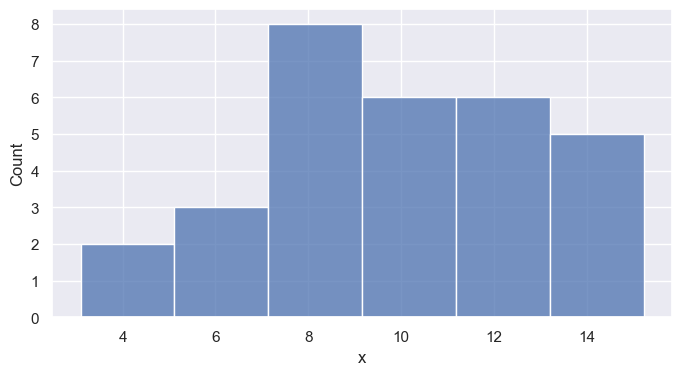

In [5]:
sns.histplot(df1['x'])

#### 平均値の区間推定

In [6]:
# 平均値の区間推定
dsw1 = sm.stats.DescrStatsW(df1['x'])
print('標本平均', round(dsw1.mean, 3))
print('標準偏差', round(dsw1.std, 3))
print('標準誤差', round(dsw1.std_mean, 3))
print('95％区間', np.round(dsw1.tconfint_mean(alpha=0.05), 3))

標本平均 9.82
標準偏差 3.027
標準誤差 0.562
95％区間 [ 8.67 10.97]


#### 平均値に対するt検定

In [7]:
# t値、p値、dfが出力される
np.round(dsw1.ttest_mean(value=10, alternative='two-sided'), 3)

array([-0.32 ,  0.751, 29.   ])

In [8]:
# 参考：片側検定
print(np.round(dsw1.ttest_mean(value=10, alternative='larger'), 3))
print(np.round(dsw1.ttest_mean(value=10, alternative='smaller'), 3))

[-0.32   0.624 29.   ]
[-0.32   0.376 29.   ]


In [9]:
# 3行プログラミング
df1 = pd.read_csv('2-3-1-sample-data-1.csv')
dsw1 = sm.stats.DescrStatsW(df1['x'])
np.round(dsw1.ttest_mean(value=10, alternative='two-sided'), 3)

array([-0.32 ,  0.751, 29.   ])

### 2変量データの分析（数量×カテゴリー）

#### データの読み込み

In [10]:
# データの読み込み
df2 = pd.read_csv('2-3-2-sample-data-2.csv')
print(df2.head(3))

       x category
0  9.624        A
1  7.388        A
2  7.472        A


#### 統計量の計算

In [11]:
print(df2.groupby('category').describe())

             x                                                           
         count      mean       std    min     25%    50%      75%     max
category                                                                 
A         15.0  7.923867  1.256656  5.698  7.3135  7.678   8.9995   9.745
B         15.0  9.868733  2.328365  6.698  7.6575  9.631  11.6695  13.434


#### 可視化

<Axes: xlabel='x', ylabel='Count'>

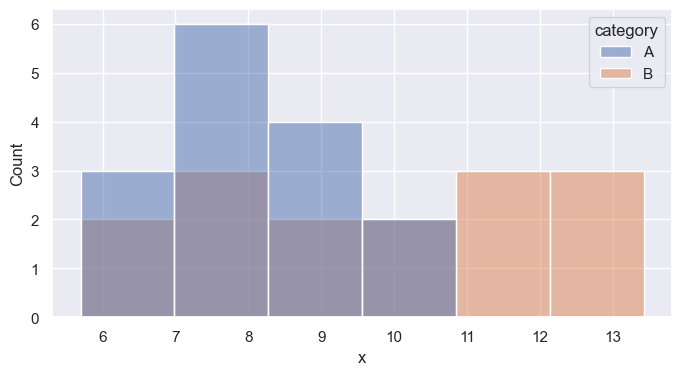

In [12]:
sns.histplot(x='x', hue='category', data=df2)

<Axes: xlabel='category', ylabel='x'>

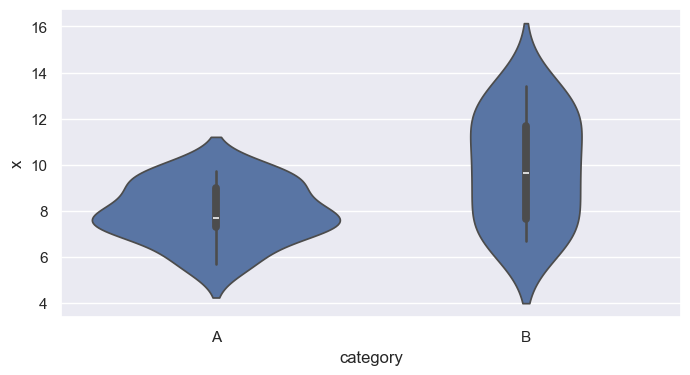

In [13]:
sns.violinplot(x='category', y='x', data=df2)

#### 平均値の差の区間推定

In [14]:
print(df2.query('category == "A"').head(3))

       x category
0  9.624        A
1  7.388        A
2  7.472        A


In [15]:
# データの分割
category_a = df2.query('category == "A"')['x']
category_b = df2.query('category == "B"')['x']

In [16]:
#平均値の差の信頼区間
dsw2_a = sm.stats.DescrStatsW(category_a)
dsw2_b = sm.stats.DescrStatsW(category_b)

cm = sm.stats.CompareMeans(dsw2_a, dsw2_b)
np.round(cm.tconfint_diff(alpha=0.05, usevar='unequal'), 3)

array([-3.363, -0.526])

#### 平均の差に対するt検定

In [17]:
# t値、p値、dfが出力される
np.round(cm.ttest_ind(usevar='unequal', alternative='two-sided'), 3)

array([-2.8470e+00,  1.0000e-02,  2.1518e+01])

In [18]:
# t値、p値、dfが出力される
np.round(sm.stats.ttest_ind(
    category_a, category_b, 
    usevar='unequal', alternative='two-sided'), 3)

array([-2.8470e+00,  1.0000e-02,  2.1518e+01])

### 2変量データの分析（数量×数量）

#### データの読み込み

In [19]:
# データの読み込み
df3 = pd.read_csv('2-3-3-sample-data-3.csv')
print(df3.head(3))

        x       y
0  46.243  36.461
1  23.882  20.932
2  24.718  19.277


#### 統計量の計算

In [20]:
print(df3.describe())

               x          y
count  30.000000  30.000000
mean   29.400567  29.133033
std    10.263615   9.645102
min     6.985000   5.418000
25%    22.581750  23.143500
50%    27.891000  30.262000
75%    37.947500  36.180750
max    47.448000  44.831000


#### 可視化

<Axes: xlabel='x', ylabel='y'>

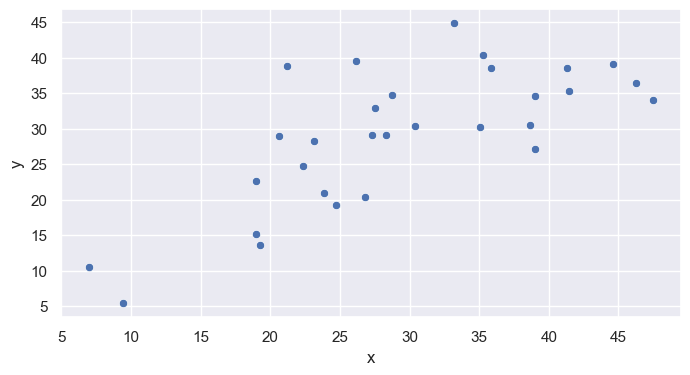

In [21]:
sns.scatterplot(x='x', y='y', data=df3)

#### 回帰分析

In [22]:
# モデルの構築
lm_model = smf.ols(formula='y ~ x', data=df3).fit()

# 結果の確認
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     31.02
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           5.86e-06
Time:                        16:39:00   Log-Likelihood:                -98.868
No. Observations:                  30   AIC:                             201.7
Df Residuals:                      28   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1027      3.802      2.394      0.0

#### 分散分析

In [23]:
print(sm.stats.anova_lm(lm_model))

            df       sum_sq      mean_sq          F    PR(>F)
x          1.0  1417.965482  1417.965482  31.021716  0.000006
Residual  28.0  1279.846475    45.708803        NaN       NaN


In [24]:
# まとめ
df3 = pd.read_csv('2-3-3-sample-data-3.csv')
lm_model = smf.ols(formula='y ~ x', data=df3).fit()
print(lm_model.summary())
print(sm.stats.anova_lm(lm_model))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     31.02
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           5.86e-06
Time:                        16:39:00   Log-Likelihood:                -98.868
No. Observations:                  30   AIC:                             201.7
Df Residuals:                      28   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1027      3.802      2.394      0.0

### サンプルデータの利用
https://www.statsmodels.org/dev/datasets/index.html

#### load_pandas関数の利用

In [25]:
nile = sm.datasets.nile.load_pandas().data
print(nile.head(3))

     year  volume
0  1871.0  1120.0
1  1872.0  1160.0
2  1873.0   963.0


In [26]:
# 参考：別のデータの読み込み
sm.datasets.co2.load_pandas().data.head(3)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6


In [27]:
print(sm.datasets.co2.DESCRLONG)


Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.

Period of Record: March 1958 - December 2001

Methods: An Applied Physics Corporation (APC) nondispersive infrared gas analyzer was used to obtain atmospheric CO2 concentrations, based on continuous data (four measurements per hour) from atop intake lines on several towers. Steady data periods of not less than six hours per day are required; if no such six-hour periods are available on any given day, then no data are used that day. Weekly averages were calculated for most weeks throughout the approximately 44 years of record. The continuous data for year 2000 is compared with flask data from the same site in the graphics section.


In [28]:
print(sm.datasets.nile.COPYRIGHT)
print('---------------')
print(sm.datasets.nile.DESCRLONG)
print('---------------')
print(sm.datasets.nile.NOTE)

This is public domain.
---------------
This dataset contains measurements on the annual flow of
the Nile as measured at Ashwan for 100 years from 1871-1970. There is an apparent changepoint near 1898.
---------------
::

    Number of observations: 100
    Number of variables: 2
    Variable name definitions:

        year - the year of the observations
        volumne - the discharge at Aswan in 10^8, m^3



#### get_rdataset関数の利用

In [29]:
sm.datasets.get_rdataset("Nile").data.head(3)

,time,value
0,1871,1120
1,1872,1160
2,1873,963


In [30]:
AirPassengers = sm.datasets.get_rdataset("AirPassengers")
print(AirPassengers.data.head(3))

          time  value
0  1949.000000    112
1  1949.083333    118
2  1949.166667    132


In [31]:
print(AirPassengers.__doc__)

.. container::

   .. container::

      ============= ===============
      AirPassengers R Documentation
      ============= ===============

      .. rubric:: Monthly Airline Passenger Numbers 1949-1960
         :name: monthly-airline-passenger-numbers-1949-1960

      .. rubric:: Description
         :name: description

      The classic Box & Jenkins airline data. Monthly totals of
      international airline passengers, 1949 to 1960.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         AirPassengers

      .. rubric:: Format
         :name: format

      A monthly time series, in thousands.

      .. rubric:: Source
         :name: source

      Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time
      Series Analysis, Forecasting and Control.* Third Edition.
      Holden-Day. Series G.

      .. rubric:: Examples
         :name: examples

      .. code:: R

         ## The classic 'airline model', by full ML
         (fit <- arima(log10(AirPassen

#### pmdarimaライブラリのデータ
https://alkaline-ml.com/pmdarima/modules/datasets.html

In [32]:
taylor = pm.datasets.load_taylor(as_series=True)
taylor.head(3)

0    22262.0
1    21756.0
2    22247.0
dtype: float64